In [34]:
import sys
import os
sys.path.append(os.path.abspath(".."))
from src.preprocess import load_data, summary, null_values, unique_columns , remove_collinear_features
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = load_data("../data/uci-secom.csv")
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [3]:
display(summary(data).sort_values(by='Nulls', ascending=False))


Data shape: (1567, 592)
___________________________
Data Types:
Types
float64    590
int64        1
object       1
Name: count, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
293,float64,138,139,1429,82.3233,879.226
292,float64,138,93,1429,0.0041,0.0831
157,float64,138,129,1429,0.0118,0.2876
158,float64,138,139,1429,234.0996,2505.2998
358,float64,226,21,1341,0.0017,0.0047
...,...,...,...,...,...,...
393,float64,1567,953,0,0.0342,0.2994
392,float64,1567,109,0,0.0005,0.0229
120,float64,1567,1269,0,5.1259,7.522
87,float64,1567,249,0,0.7749,0.9935


In [4]:
data_null = null_values(data)
data_null

,Missing_Records,Percentage %
292,1429,91.193363
157,1429,91.193363
158,1429,91.193363
293,1429,91.193363
492,1341,85.577537
...,...,...
585,1,0.063816
586,1,0.063816
587,1,0.063816
588,1,0.063816


In [5]:
data_null = data_null[data_null['Percentage %'] > 50]
data_null

,Missing_Records,Percentage %
292,1429,91.193363
157,1429,91.193363
158,1429,91.193363
293,1429,91.193363
492,1341,85.577537
220,1341,85.577537
358,1341,85.577537
85,1341,85.577537
516,1018,64.964901
517,1018,64.964901


In [6]:
data_null.shape

(28, 2)

**28 features have missing data on more than 50% of the examples**

In [7]:
data= data.drop(data_null.index, axis='columns')
data.shape

(1567, 564)

In [8]:
#strategy 1: latest information available
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)
data

C:\Users\hp\AppData\Local\Temp\ipykernel_5920\403407019.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_5920\403407019.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


,Time,0,1,2,3,4,5,6,7,8,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.0096,0.0201,0.0060,208.2045,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.4333,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [9]:
null_values(data)

,Missing_Records,Percentage %


All missing values are handled

In [10]:
len(unique_columns(data))

116

unique columns are identified, since it doesn't have effect on the result, it should be removed

In [11]:
data=data.drop(axis=1, columns =unique_columns(data))
data.shape

(1567, 448)

unique

The time colomun is not needed further. 

In [12]:
data.drop(columns ='Time', axis ='columns', inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 447 entries, 0 to Pass/Fail
dtypes: float64(446), int64(1)
memory usage: 5.3 MB


The datas are now cleaned

Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64

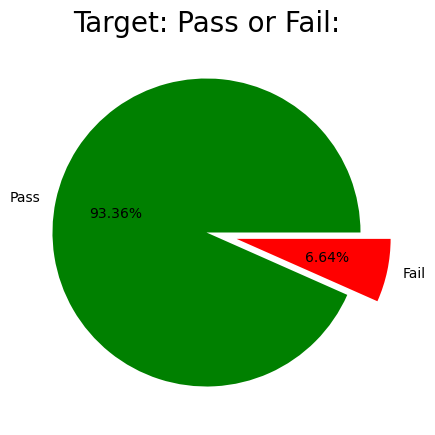

In [14]:
plt.rcParams['figure.figsize']=(5,5)
labels = ['Pass','Fail']
color =['green','red']
explode=[0,0.2]
# plt.style.use('seaborn-deep')
size = data['Pass/Fail'].value_counts()
plt.pie(size, labels=labels, colors = color, explode=explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Target: Pass or Fail:', fontsize = 20)
data['Pass/Fail'].value_counts()

In [15]:
data.corr()['Pass/Fail'].sort_values

<bound method Series.sort_values of 0           -0.024604
1           -0.006404
2           -0.001835
3           -0.025346
4           -0.013639
               ...   
586          0.004319
587          0.035319
588          0.031124
589         -0.002849
Pass/Fail    1.000000
Name: Pass/Fail, Length: 447, dtype: float64>

The feature(input) columns does not have strong correlation with the target

In [16]:
data=remove_collinear_features(data, 0.70)

17 | 11 | 0.79
22 | 21 | 0.73
26 | 25 | 0.82
27 | 25 | 0.98
27 | 26 | 0.79
30 | 29 | 0.86
34 | 32 | 0.75
35 | 34 | 0.77
36 | 32 | 0.75
36 | 34 | 1.0
36 | 35 | 0.77
39 | 34 | 0.8
39 | 36 | 0.8
46 | 45 | 0.81
50 | 46 | 0.9
51 | 47 | 0.71
54 | 53 | 0.94
60 | 43 | 0.89
65 | 64 | 0.84
66 | 46 | 0.82
66 | 50 | 0.76
70 | 46 | 0.8
70 | 50 | 0.77
70 | 62 | 0.73
70 | 66 | 0.9
96 | 94 | 0.96
98 | 94 | 0.84
98 | 96 | 0.87
101 | 94 | 0.73
101 | 96 | 0.79
101 | 98 | 0.91
104 | 99 | 0.99
105 | 92 | 0.99
106 | 93 | 0.99
123 | 121 | 0.94
124 | 121 | 0.89
124 | 123 | 0.86
125 | 122 | 0.71
127 | 122 | 0.96
130 | 122 | 0.83
130 | 127 | 0.79
140 | 4 | 1.0
147 | 16 | 0.89
148 | 16 | 0.97
148 | 147 | 0.89
152 | 16 | 0.98
152 | 147 | 0.9
152 | 148 | 0.99
154 | 16 | 0.87
154 | 147 | 0.8
154 | 148 | 0.94
154 | 152 | 0.89
155 | 19 | 0.8
163 | 26 | 0.71
163 | 159 | 0.76
164 | 26 | 0.77
164 | 159 | 0.8
164 | 163 | 0.92
165 | 26 | 0.74
165 | 159 | 0.79
165 | 163 | 0.9
165 | 164 | 0.96
174 | 172 | 1.0
185 | 184 | 0.

In [17]:
data.head()

,0,1,2,3,4,6,7,8,9,10,...,565,570,571,572,582,583,586,587,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,0.6219,533.8500,2.1113,8.95,0.5005,0.0118,0.0096,0.0201,208.2045,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,0.6219,535.0164,2.4335,5.92,0.5019,0.0223,0.0096,0.0201,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,0.6219,535.0245,2.0293,11.21,0.4958,0.0157,0.0584,0.0484,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,0.1630,530.5682,2.0253,9.33,0.4990,0.0103,0.0202,0.0149,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,0.1630,532.0155,2.0275,8.83,0.4800,0.4766,0.0202,0.0149,73.8432,-1


In [18]:
data.shape

(1567, 205)

**Split data**

In [28]:
X = data.drop(['Pass/Fail'], axis=1)
y = data['Pass/Fail']

print(f"The features have {X.shape}")
print(f"The target have {y.shape}")

The features have (1567, 204)
The target have (1567,)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42, stratify  = y)

In [31]:
print(f"Shape of X_train {X_train.shape}")
print(f"Shape of X_test {X_test.shape}")
print(f"Shape of y_trian {y_train.shape}")
print(f"Shape of y_test {y_test.shape}")

Shape of X_train (1253, 204)
Shape of X_test (314, 204)
Shape of y_trian (1253,)
Shape of y_test (314,)


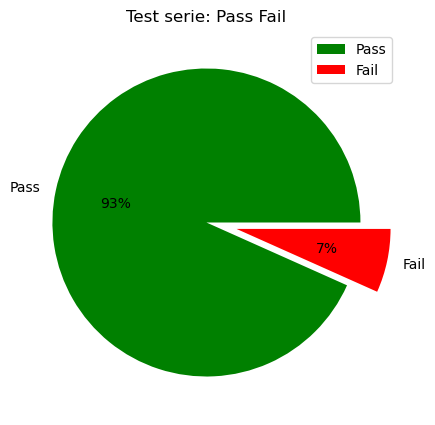

In [33]:
size = y_test.value_counts()
plt.pie(size, labels= labels, colors= color, explode = explode,autopct = "%.f%%" )
plt.title("Test serie: Pass Fail")
plt.legend()
plt.show()

In [ ]:
sc = StandardScaler()
X_train sc.fit_transform(X_train)